<a href="https://colab.research.google.com/github/MohammedAli201/test/blob/main/Yolo_for_keypoint_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 8.4 MB/s eta 0:00:00


In [ ]:
import zipfile
path = '/content/drive/MyDrive/data.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
from ultralytics import YOLO

In [ ]:
!ls '/content/drive/MyDrive'

In [ ]:
model = YOLO('yolov8m-pose.pt')  # load a pretrained model (recommended for training)


100%|██████████| 50.8M/50.8M [00:00<00:00, 53.6MB/s]


In [ ]:

model.train(data='/content/drive/MyDrive/config.yaml', epochs=500, imgsz=640)

##Verify if any images are missing labels.



In [ ]:
import os

image_dir = '/content/data/labels/test'
label_dir = '/content/data/labels/test'

image_files = set(os.listdir(image_dir))
label_files = set(os.listdir(label_dir))

for img_file in image_files:
    label_file = img_file.rsplit('.', 1)[0] + '.txt'
    if label_file not in label_files:
        print(f"Missing label for image {img_file}")


Use the trained models. After completing the training process, we obtained two models. We have decided to use `last.pt` at this stage.

In [ ]:
model_path = "/content/last.pt"

##As we have many images, we just test one image to see how the model is predicting the keypoints

In [ ]:
im_pth = '/content/47e9722e-2555-458d-ba0e-79ee8cf075f1-removebg-preview.png'
im = cv2.imread(im_pth)
print(im.shape)

(433, 577, 3)


In [ ]:
model = YOLO(model_path)

In [ ]:
res = model(im_pth)[0]


image 1/1 /content/47e9722e-2555-458d-ba0e-79ee8cf075f1-removebg-preview.png: 480x640 1 fish, 29.9ms
Speed: 3.4ms preprocess, 29.9ms inference, 3.4ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:
for result in res:
  for keypoint in result.keypoints:
      print((keypoint))


In [ ]:
keypoints_list = []

In [ ]:
# Initialization
max_avg_confidence = -float("inf")  # Start with a very low value
selected_keypoints_coords = None

# Find the result with the highest average confidence
for result in res:
    if hasattr(result, 'keypoints') and hasattr(result.keypoints, 'conf'):
        avg_confidence = result.keypoints.conf.mean().item()
        if avg_confidence > max_avg_confidence:
            max_avg_confidence = avg_confidence
            selected_keypoints_coords = result.keypoints.xy

# Extract keypoints from the result with the highest average confidence
keypoints_list = []
if selected_keypoints_coords is not None:
    for coords in selected_keypoints_coords:
        for x, y in coords:
            keypoints_list.append([x, y])

print(keypoints_list)


In [ ]:
import numpy as np

In [ ]:
keypoints_list

[[tensor(0., device='cuda:0'), tensor(0., device='cuda:0')],
 [tensor(0., device='cuda:0'), tensor(0., device='cuda:0')],
 [tensor(0., device='cuda:0'), tensor(0., device='cuda:0')],
 [tensor(0., device='cuda:0'), tensor(0., device='cuda:0')],
 [tensor(99.9576, device='cuda:0'), tensor(186.6443, device='cuda:0')],
 [tensor(115.6308, device='cuda:0'), tensor(232.8568, device='cuda:0')],
 [tensor(112.7078, device='cuda:0'), tensor(252.8461, device='cuda:0')],
 [tensor(114.6893, device='cuda:0'), tensor(250.8145, device='cuda:0')],
 [tensor(234.7021, device='cuda:0'), tensor(157.1941, device='cuda:0')],
 [tensor(283.1020, device='cuda:0'), tensor(167.3212, device='cuda:0')],
 [tensor(266.9483, device='cuda:0'), tensor(268.5771, device='cuda:0')],
 [tensor(375.1783, device='cuda:0'), tensor(259.8256, device='cuda:0')],
 [tensor(423.9136, device='cuda:0'), tensor(247.6799, device='cuda:0')],
 [tensor(421.7097, device='cuda:0'), tensor(195.0436, device='cuda:0')],
 [tensor(454.2717, device='

In [ ]:
numpy_array = np.array([[t[0].cpu().numpy(), t[1].cpu().numpy()] for t in keypoints_list])

print(numpy_array)

In [ ]:
for (x, y) in keypoints_list:
    cv2.circle(im, (int(x), int(y)), 5, (0, 0, 255), 3)  # 5 is the radius of the circle, and (0,0,255) is the BGR color for red

# Save or display the image
cv2_imshow(im)
# cv2.imwrite('/content/output.png', im)

In [ ]:
# from ultralytics import YOLO
# import cv2
# from ultralytics.utils.plotting import Annotator  # ultralytics.yolo.utils.plotting is deprecated

# # Load the model
# #model = YOLO('yolov8n.pt')

# # Load the image
# #img_path = "path_to_your_image.jpg"
# #image = cv2.imread(img_path)

# # Convert the image from BGR to RGB (OpenCV loads images in BGR format by default)
# img_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# # Predict using YOLO
# #results = model.predict(img_rgb)

# for re in res:

#     annotator = Annotator(im)

#     boxes = re.boxes
#     print(boxes)
#     for box in boxes:

#         b = box.xyxy[0]  # get box coordinates in (top, left, bottom, right) format
#         c = box.cls
#         annotator.box_label(b, model.names[int(c)])

#     image = annotator.result()

# # Show the image with detections
# cv2_imshow(im)
# cv2.waitKey(0)  # Waits indefinitely until a key is pressed
# cv2.destroyAllWindows()

# # Optionally, save the result image
# #cv2.imwrite('output_image.jpg', image)


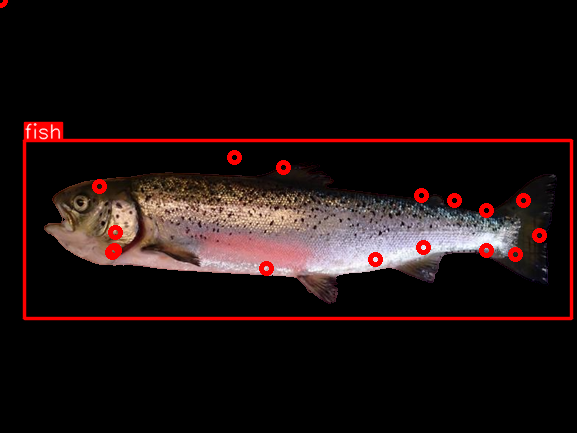

In [ ]:
from ultralytics import YOLO
import cv2
from ultralytics.utils.plotting import Annotator


box_color = (0, 0, 255)

highest_confidence = 0
highest_confidence_box = None

# Iterate through each result to find the box with the highest confidence
for re in res:
    boxes_data = re.boxes.data  # Use 'boxes.data' instead
    for box_data in boxes_data:
        conf = box_data[4].item()
        if conf > highest_confidence:
            highest_confidence = conf
            highest_confidence_box = box_data

# Now, plot only the bounding box with the highest confidence
if highest_confidence_box is not None:
    annotator = Annotator(im)
    b = highest_confidence_box[:4]  # Extract xyxy coordinates
    c = highest_confidence_box[5]   # Extract class index
    annotator.box_label(b, model.names[int(c.item())],color=box_color)
    image = annotator.result()

    # Show the image with detections
    cv2_imshow(image)
    cv2.waitKey(0)  # Waits indefinitely until a key is pressed
    cv2.destroyAllWindows()

    # save the result image
    cv2.imwrite('output_image.jpg', image)

